In [1]:
import scanpy as sc
import scFates as scf
sc.settings.verbosity=3
sc.set_figure_params(dpi=150)
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

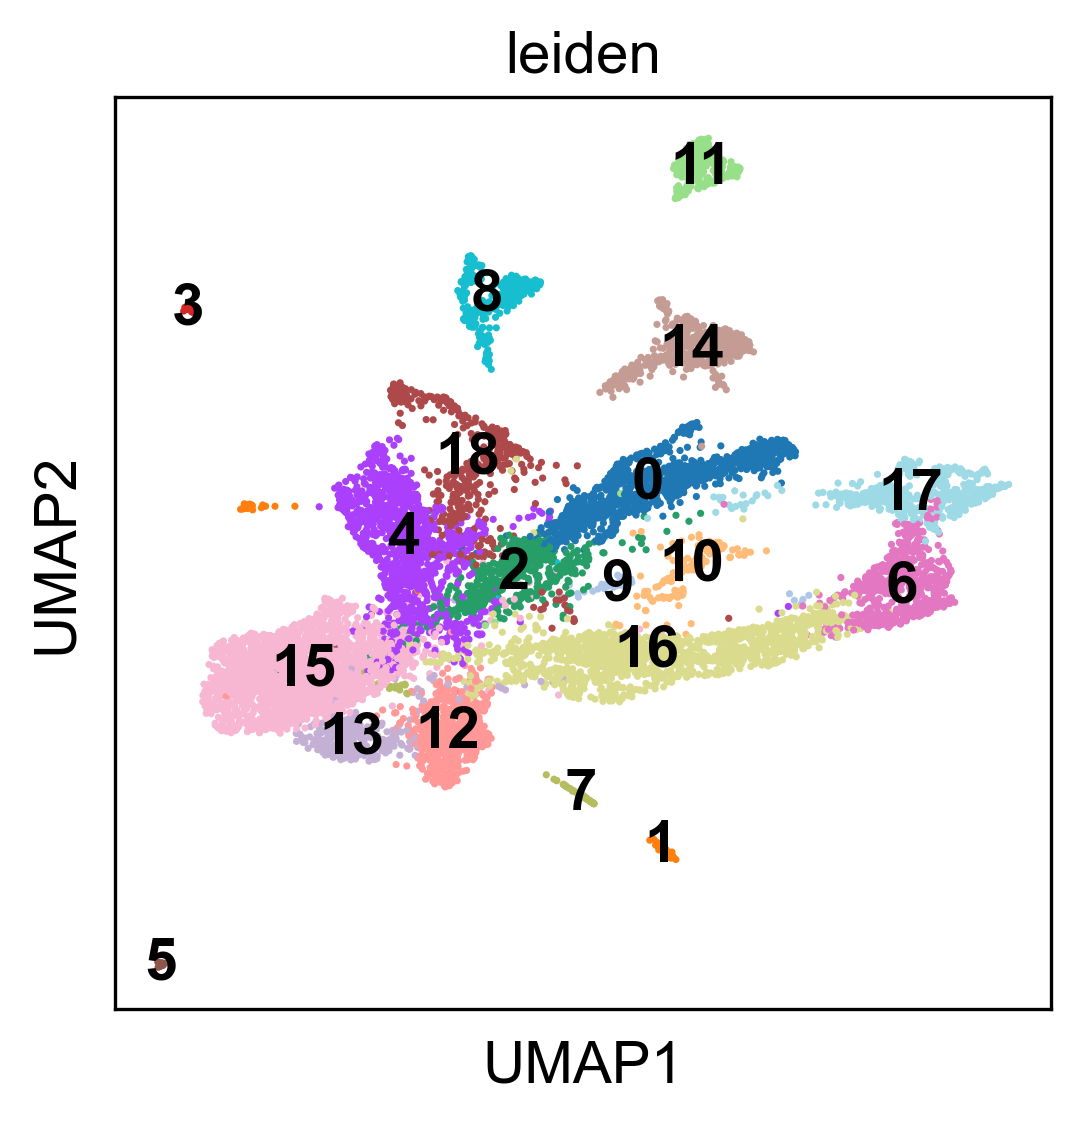

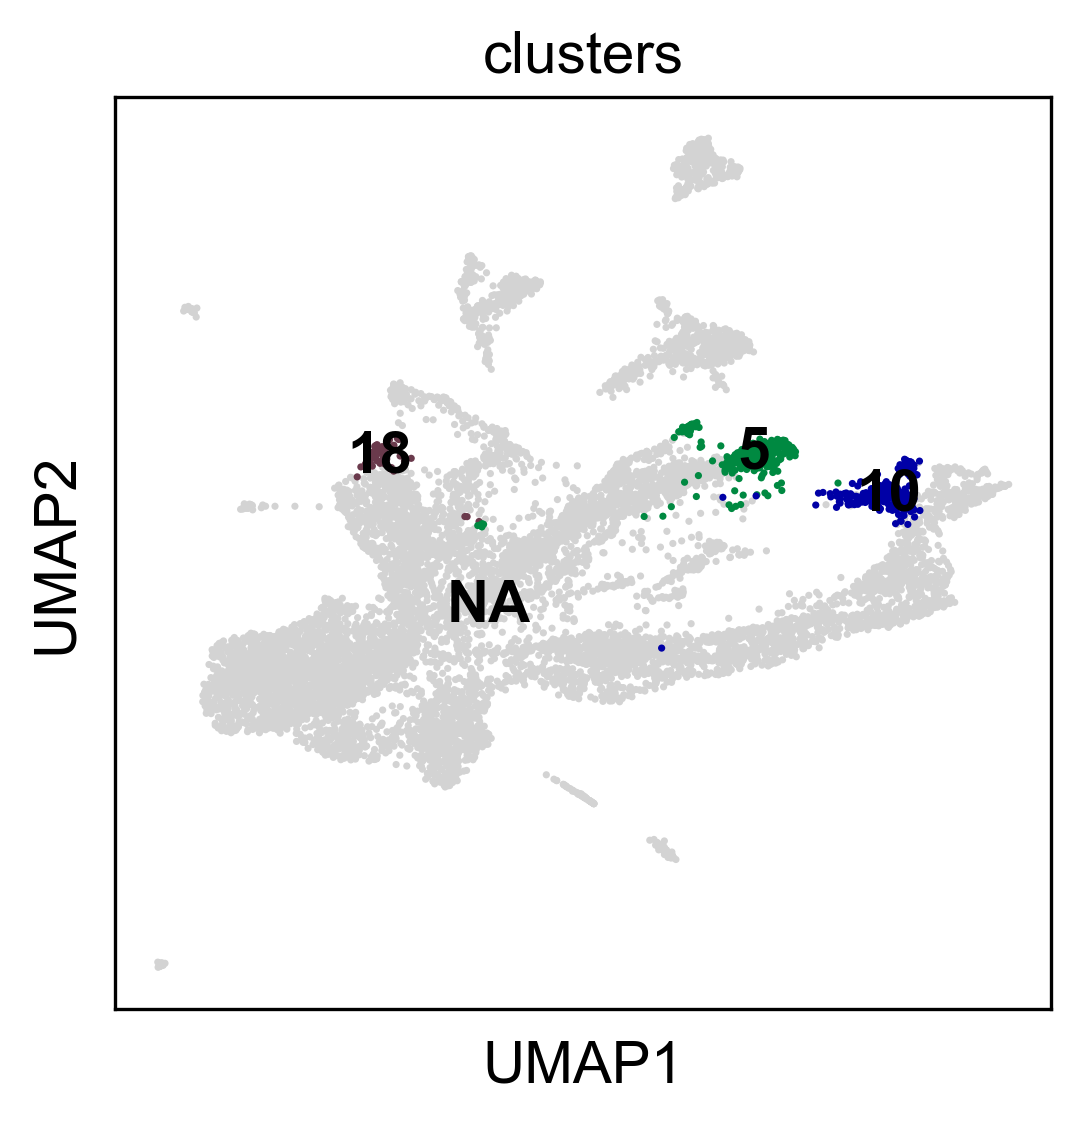

In [3]:
sc.set_figure_params(dpi=150)
adata=sc.read("adata_processed.h5ad")
sc.pl.umap(adata,color="leiden",legend_loc="on data")
sc.pl.umap(adata,color="clusters",legend_loc="on data",groups=["18","5","10"])

In [4]:
adata=adata[adata.obs.leiden.isin(["15","4","16","6","2","0"])]

In [5]:
import scanpy.external as sce
sce.tl.palantir(adata)

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.


Palantir Diffusion Maps in progress ...
Determing nearest neighbor graph...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)


In [6]:
sc.pp.neighbors(adata,n_neighbors=30,use_rep='X_palantir_multiscale',method="rapids")

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:06)


In [9]:
sc.tl.draw_graph(adata,init_pos="X_umap",iterations=500,method="rapids")

drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm) (0:00:00)


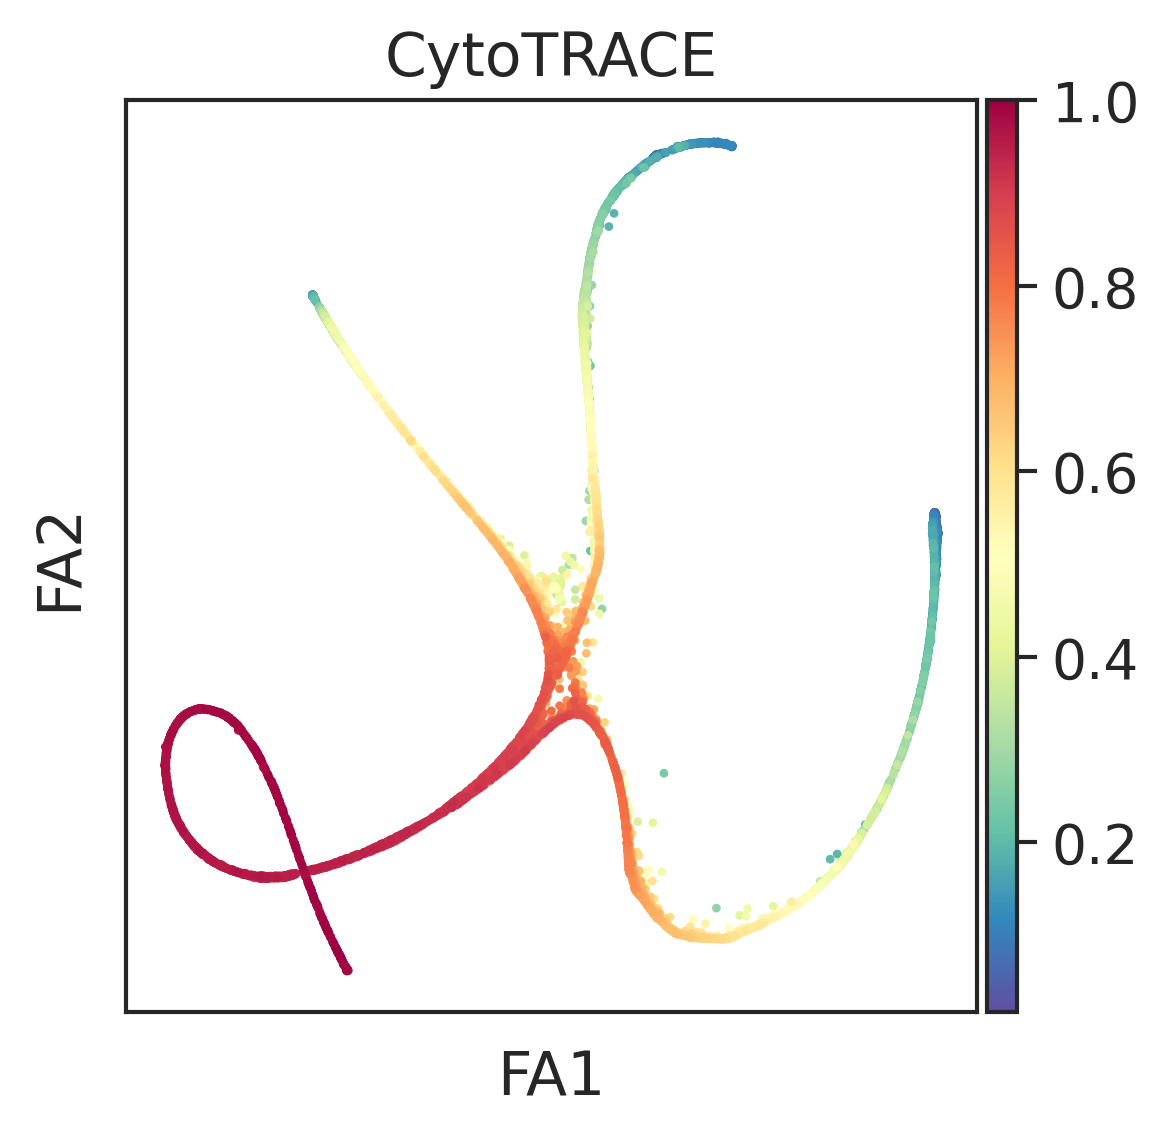

In [10]:
sc.pl.draw_graph(adata,color="CytoTRACE",cmap="Spectral_r")

In [11]:
scf.tl.tree(adata,Nodes=500,method='ppt',device='gpu',
            use_rep='X_palantir_multiscale',seed=42,ppt_sigma=.1,ppt_lambda=50)

inferring a principal tree inferring a principal tree --> parameters used 
    500 principal points, sigma = 0.1, lambda = 50, metric = euclidean
    fitting:  58%|█████▊    | 29/50 [00:02<00:01, 10.80it/s]
    converged
    finished (0:00:03) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


In [12]:
scf.tl.cleanup(adata,minbranchlength=10)

    graph cleaned --> removed 20 principal points


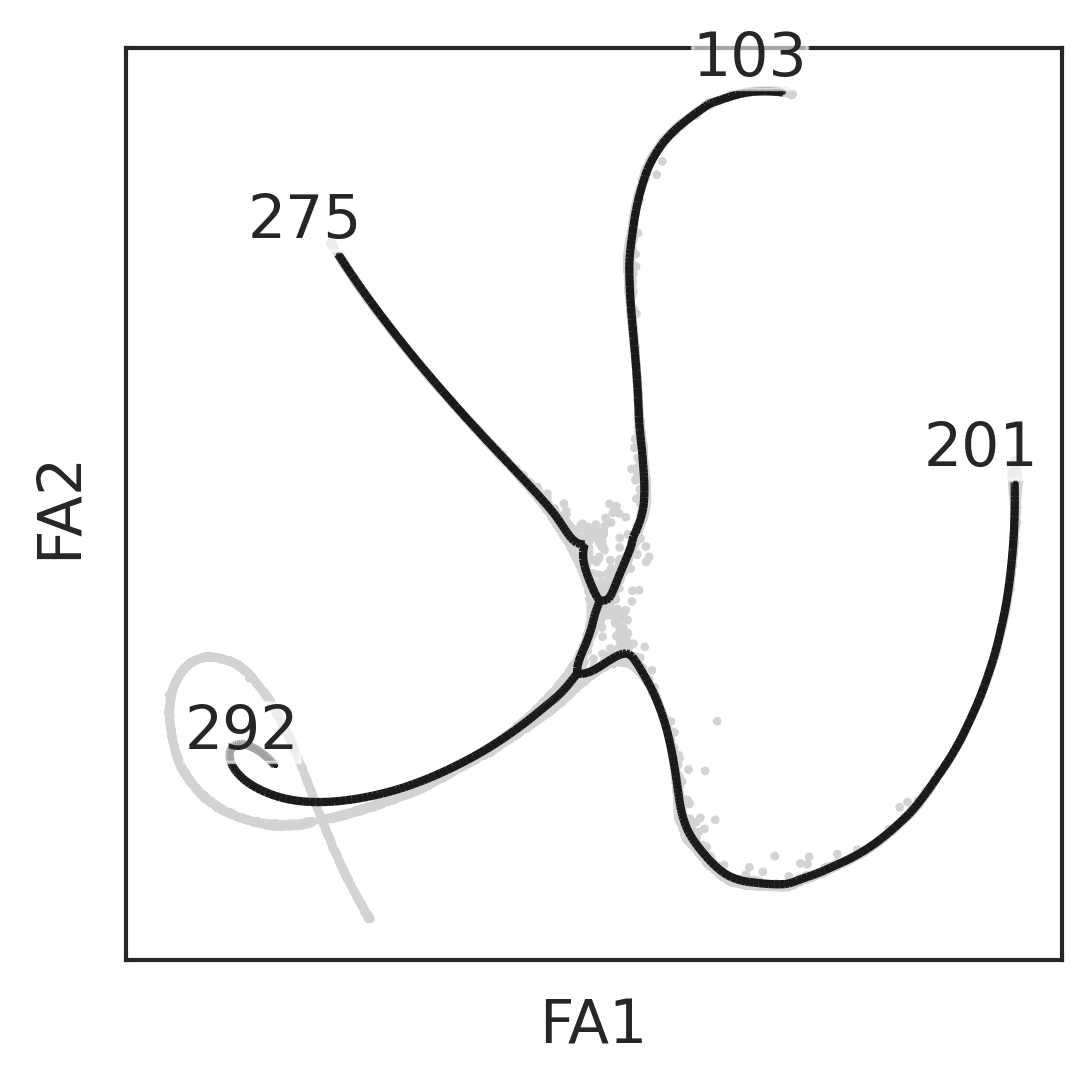

In [13]:
scf.pl.graph(adata,basis='draw_graph_fa',size_nodes=.1,tips=True,forks=False)

In [14]:
scf.tl.root(adata,292)

node 292 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [15]:
scf.tl.pseudotime(adata,n_jobs=40,n_map=100)

projecting cells onto the principal graph
    mappings: 100%|██████████| 100/100 [00:45<00:00,  2.21it/s]
    finished (0:00:49) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [16]:
adata=adata.raw.to_adata()

In [17]:
sc.pp.filter_genes(adata,min_cells=3)

filtered out 1236 genes that are detected in less than 3 cells


In [18]:
sc.pp.normalize_total(adata,target_sum=1e6)
sc.pp.log1p(adata,base=10)

normalizing counts per cell
    finished (0:00:00)


In [19]:
scf.tl.test_association(adata,n_jobs=40)

test features for association with the trajectory
    single mapping : 100%|██████████| 24921/24921 [09:08<00:00, 45.44it/s]
    found 3226 significant features (0:09:09) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


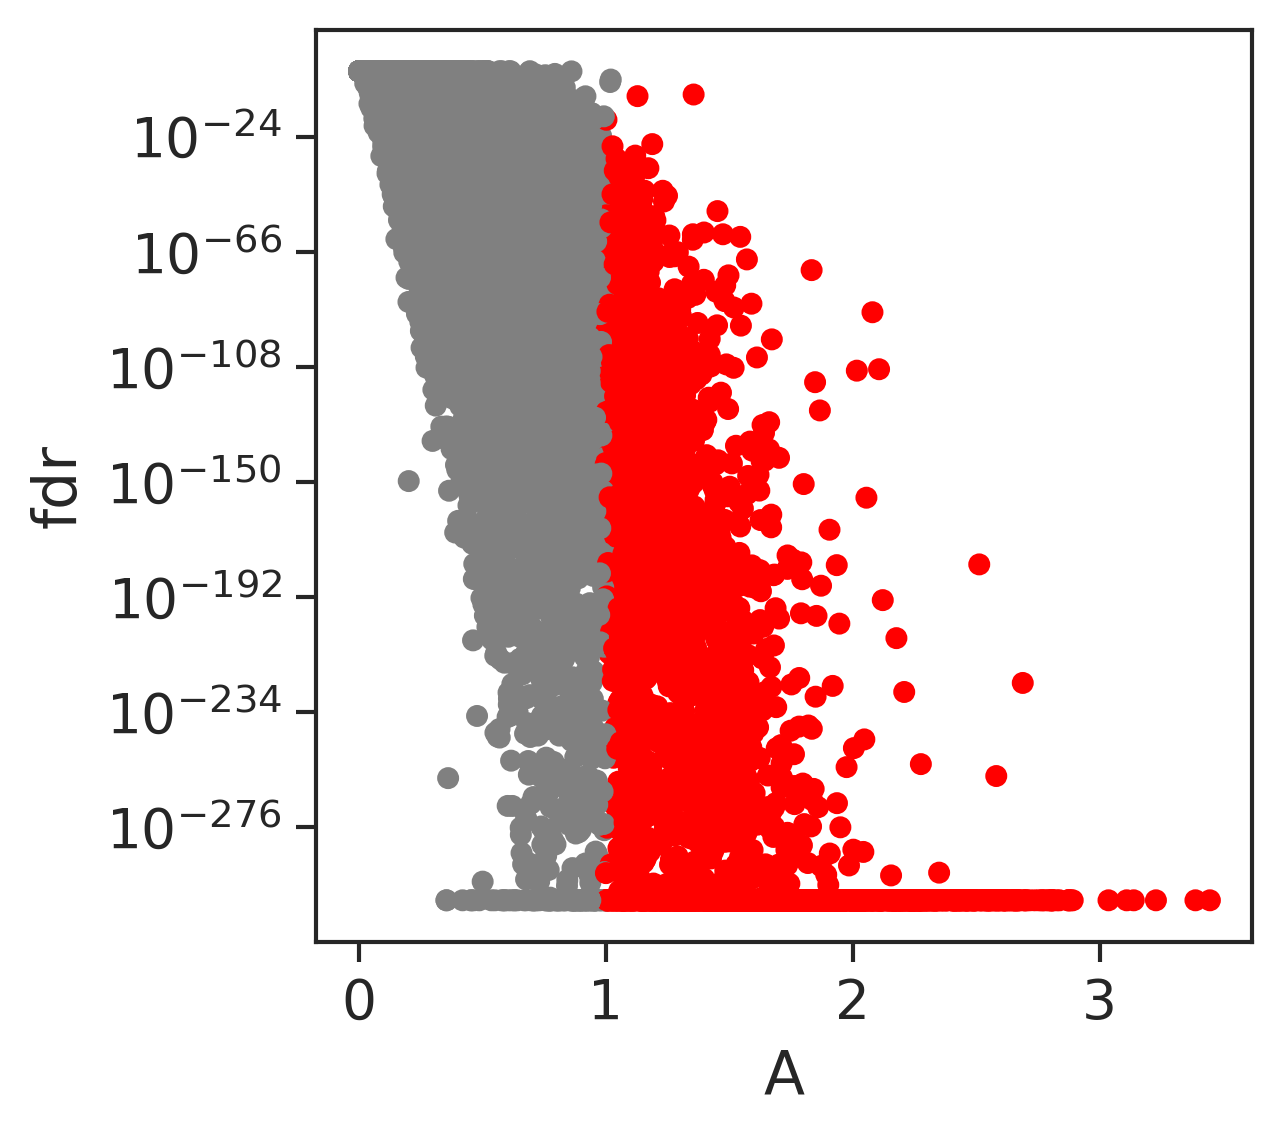

In [20]:
scf.pl.test_association(adata)

In [21]:
scf.tl.fit(adata,n_jobs=40)

fit features associated with the trajectory
    single mapping : 100%|██████████| 3226/3226 [02:05<00:00, 25.71it/s]
    finished (adata subsetted to keep only fitted features!) (0:02:13) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


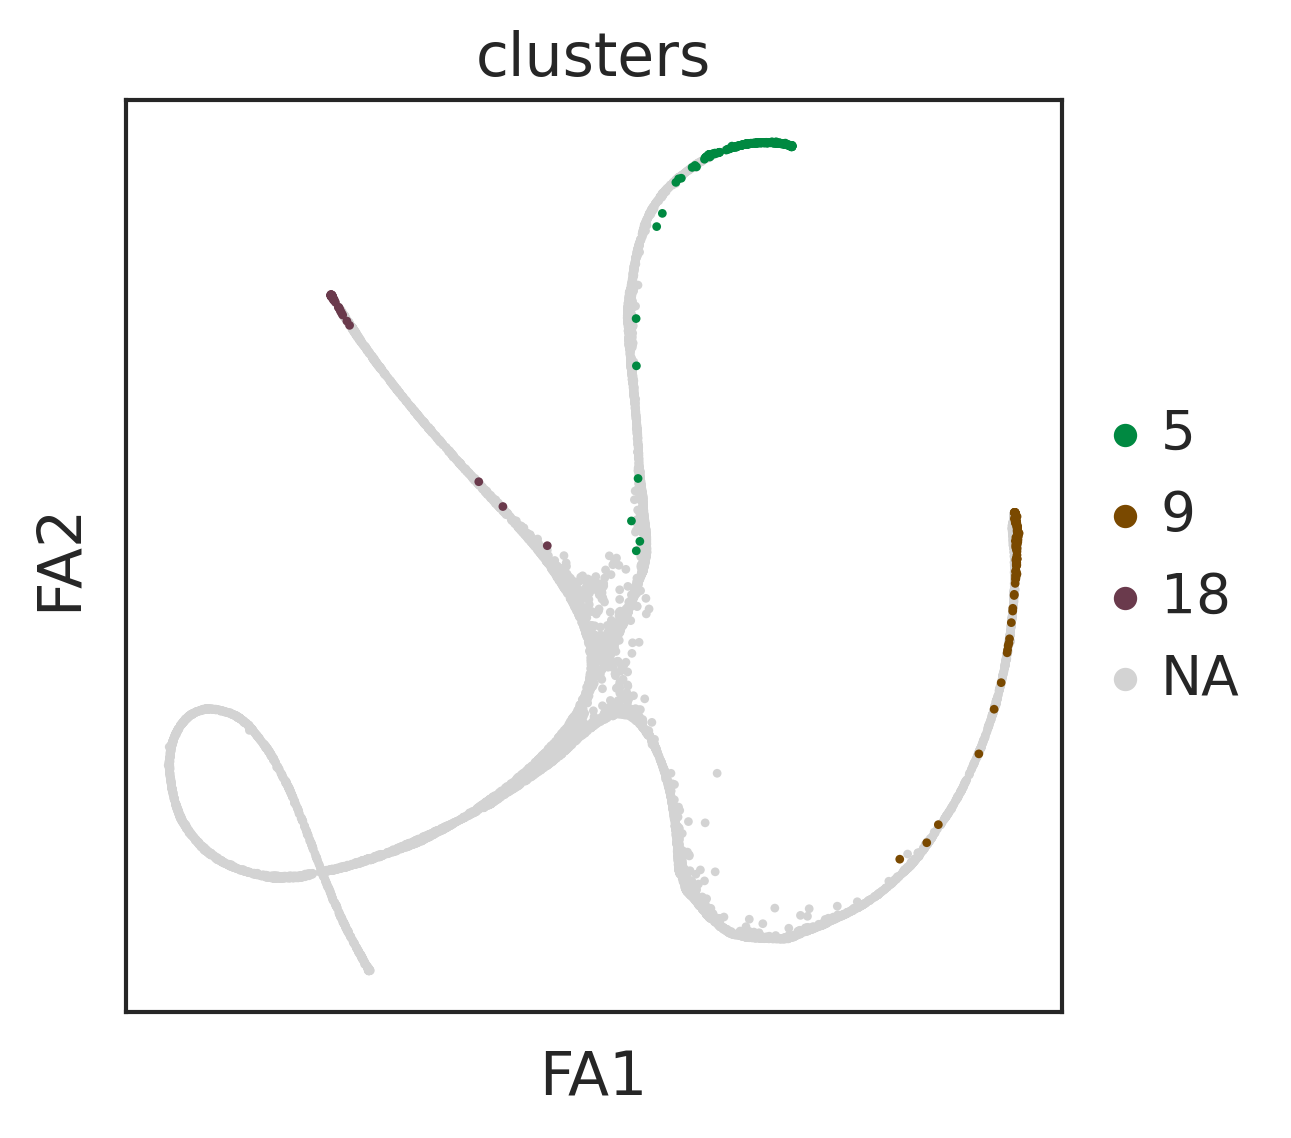

In [23]:
sc.pl.draw_graph(adata,color='clusters',groups=["18","5","9"])

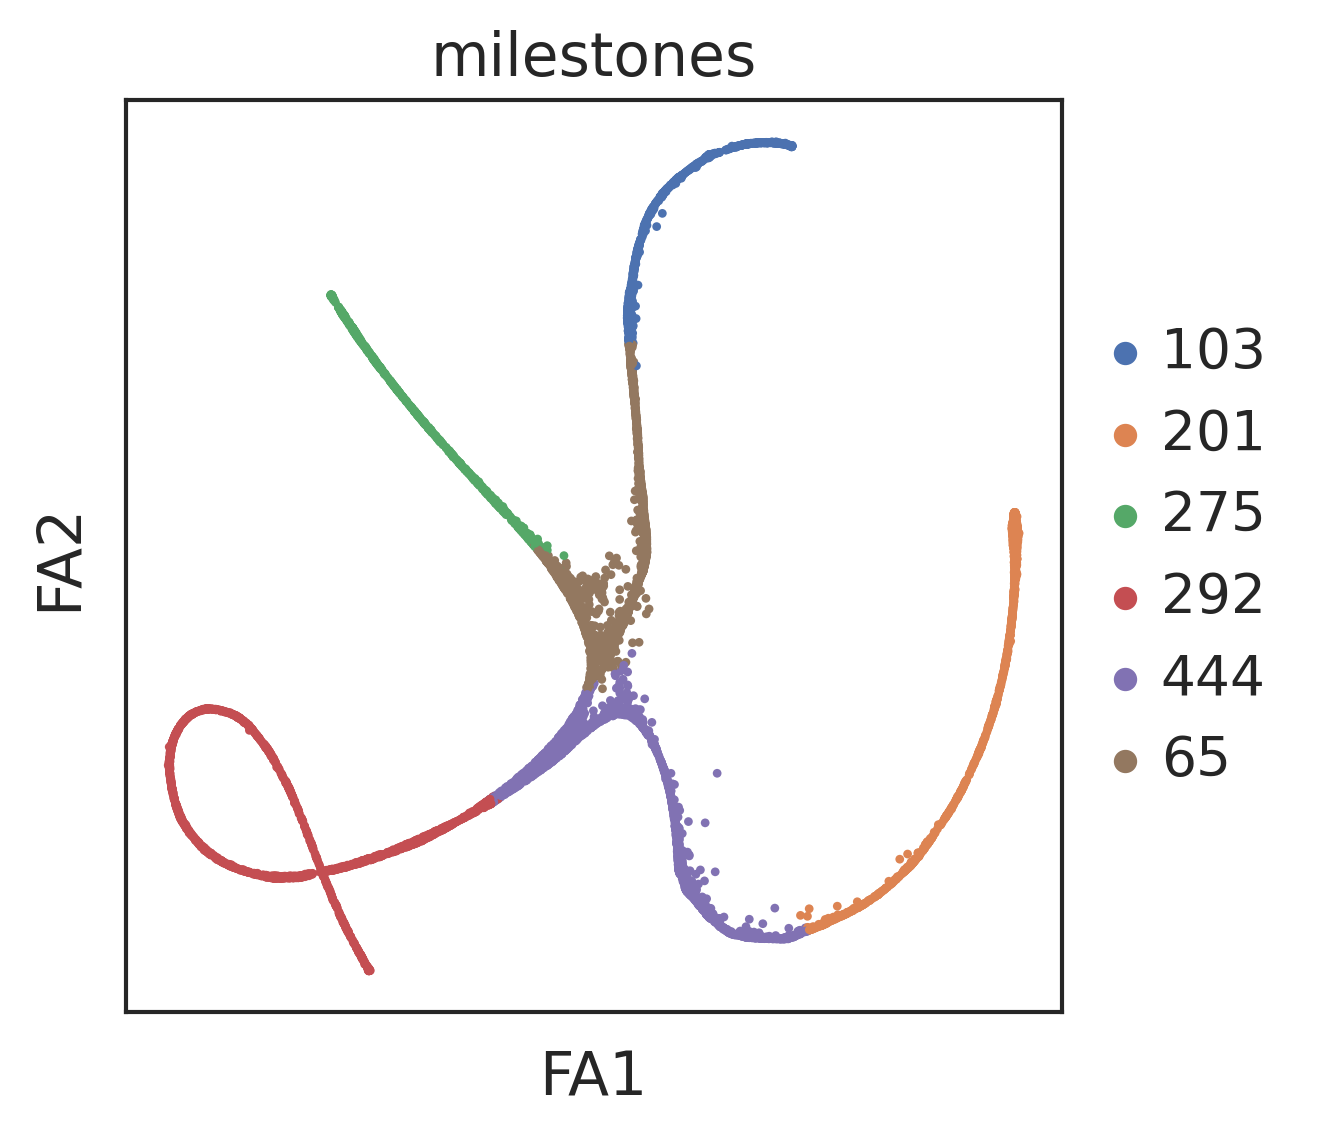

In [24]:
sc.pl.draw_graph(adata,color=["milestones"])

In [25]:
scf.tl.rename_milestones(adata,["Myopeptidocytes","Choanoblasts","Lophocytes","Archaeocytes","bifA","bifB"])

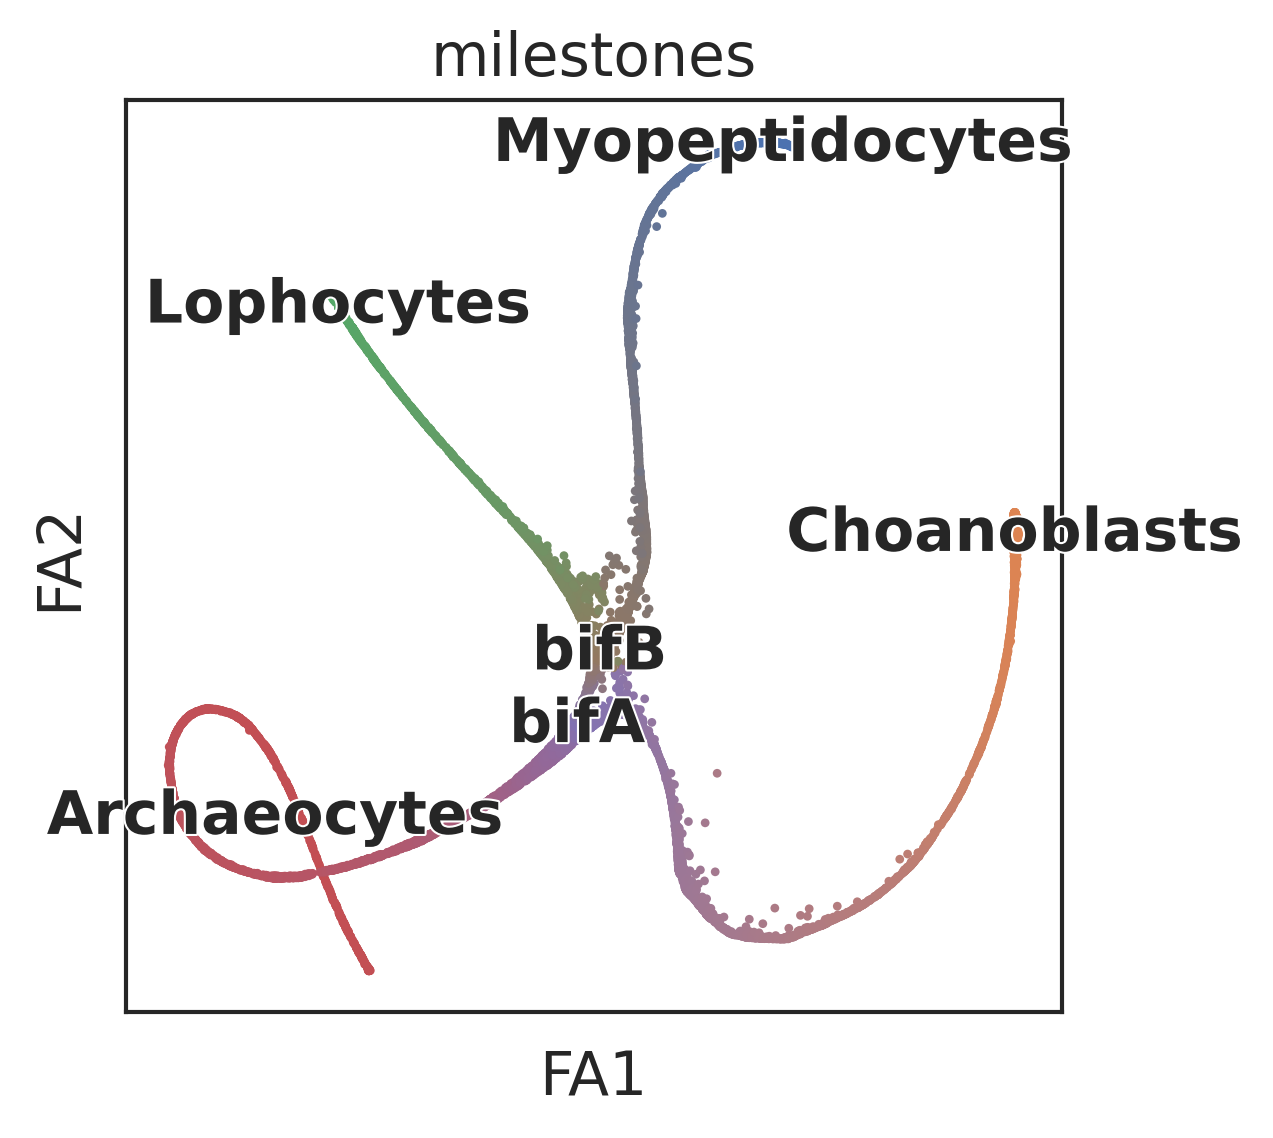

In [28]:
scf.pl.milestones(adata,annotate=True)

In [29]:
adata.write("adata_tree.h5ad")